# Generating Random Numbers from the Beta Distribution Using Rejection Sampling
#### Arman Rezaei - 9723034

- The _target_ distribution $f(x)$ is the Beta distribution with parameters $\alpha=3$ and $\beta=4$
- The initial _trial_ distribution $g(x)$ is a Normal distribution

## Comparing the Normal & Beta Distributions

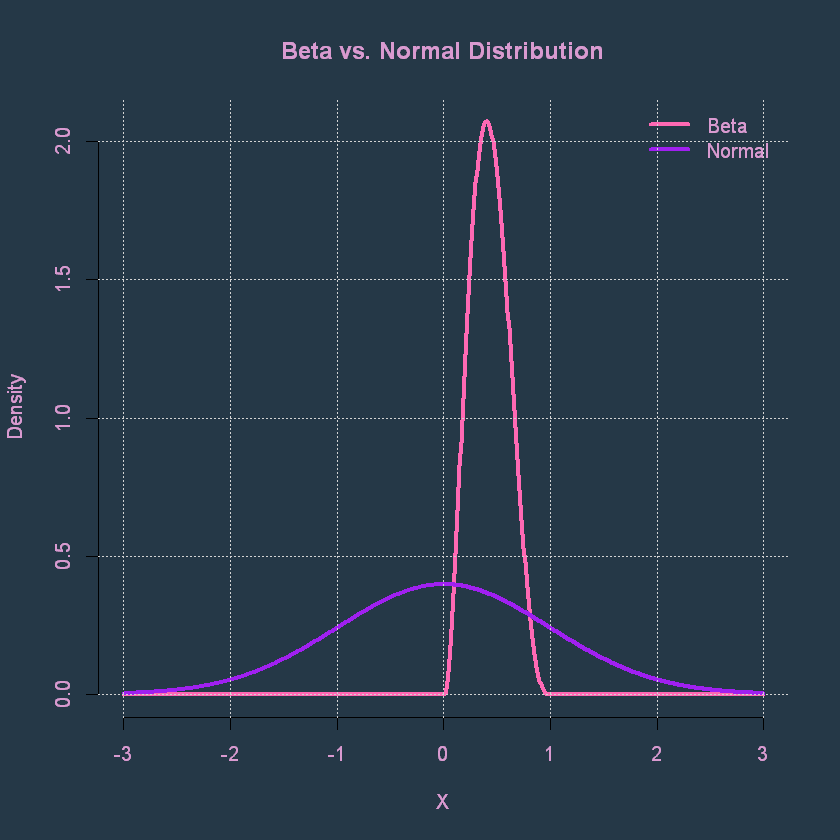

In [1]:
# range
x <- seq(-3, 3, .01)

# beta dist params
alpha = 3
beta = 4

# plotting params
theme.col = "#d99ad0"
par(bty="n", bg="#253847", col.axis=theme.col, col.lab=theme.col, col.main=theme.col)

# actual plots
plot(x, dbeta(x, alpha, beta), type="l", col="hotpink", lwd=3.5, xlab="X", ylab="Density")
lines(x, dnorm(x), col="purple", lwd=3.5)

# misc
title(main="Beta vs. Normal Distribution")
legend("topright", legend=c("Beta", "Normal"), lty=1, lwd=3.5, col=c("hotpink", "purple"), bty="n", text.col=theme.col)
grid()

## Calculating $M$

There is, however, one problem. Lets have a look at our PDF functions:

$$
f(x; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha - 1} (1-x)^{\beta - 1}
$$

Which for $\alpha=3$ and $\beta=4$ we have

$$
f(x; 3, 4) = 60 \cdot x^2 \cdot (1-x)^3
$$

And for the standard normal distribution:

$$
g(x; 0, 1) = \frac{1}{\sqrt{2 \pi}} e^{\frac{-x^2}{2}}
$$

In order to calculate $M$:

$$
\frac{f(x)}{g(x)} = 60 \sqrt{2 \pi} \frac{x^2 (1-x)^3}{e^{\frac{-x^2}{2}}} \le M
$$

Calculating the derivative of this function in order to find $M$ can be a nightmare.
Therefore, we will use a much simpler (and more inefficient) $g(x)$ such as the 
Standard Uniform distribution's PDF:

$$
g(x) = 1
$$

And now calculating $M$ is only a matter of calculating the derivative of $f$ and founding its global maximum.

$$
f'(x) = -180 x^2 (1-x)^2 + 120 x (1-x)^3 = 0 \Rightarrow x = \frac{2}{5} \Rightarrow f(x) \le f(\frac{2}{5}) \simeq 2.1 = M
$$

## Generating Beta Samples

In [2]:
# sample size
n <- 10000
M <- 2.1

# function to determine acception/rejection
accept <- function(x) {
    u <- runif(1)
    if ( 1/M * 60 * x^2 * (1-x)^3 > u ) {
        return(TRUE)
    }
    return(FALSE)
}


# trials
X <- rep(0, n)
niter <- 0
sample <- NULL

for (i in 1:n) {
    # keep trying until acception
    flag <- FALSE
    while (flag == FALSE) {
        # increment counter
        niter <- niter + 1

        # generate candidate
        sample <- runif(1)
        flag <- accept(sample)
    }
    
    X[i] <- sample
}

## Measuring Closeness to Reality

In [3]:
niter

[1] 21047

Since the probability of acceptance is $1/M$, the results should be consistent with it:

$$
\text{Theoretical number of iterations required} = M \cdot n = 2.1 \times 10000 = 21000
$$

$$
P_{theoretical}(\text{accept}) = \frac{1}{M} \simeq 0.48
$$

$$
P_{actual}(\text{accept}) = \frac{n}{n_{iter}} = \frac{10000}{21200} \simeq 0.47
$$

The results seem consistent enough. Lets use a quantile-quantile plot to visually see whether
the random numbers generated are close to the actual distribution.

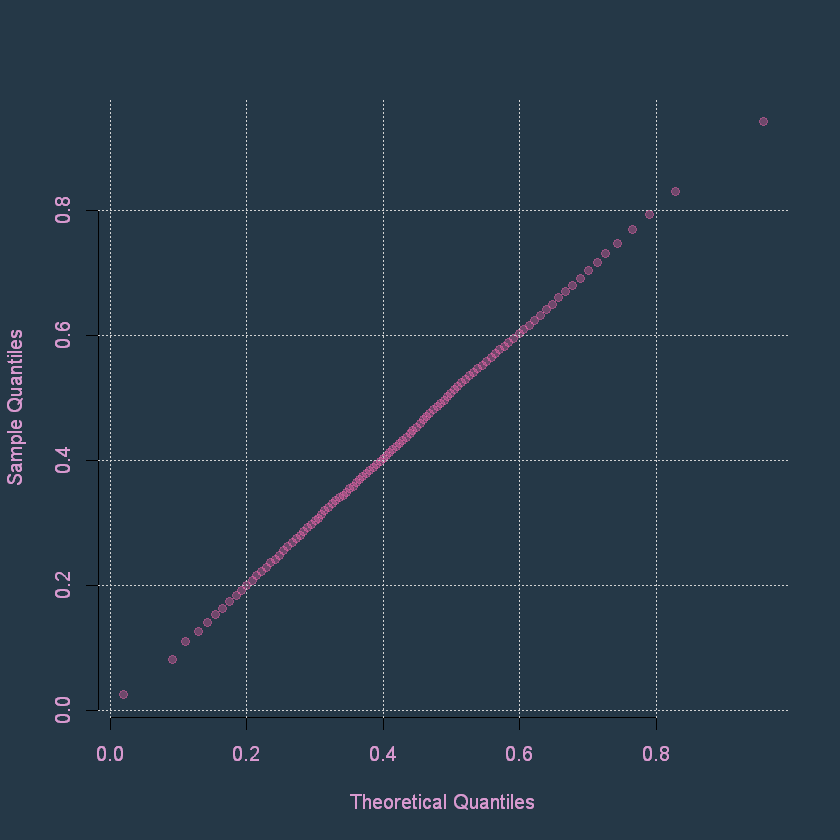

In [4]:
probs <- seq(0, 1, 0.01)
x <- quantile(rbeta(n, alpha, beta), probs)
y <- quantile(X, probs)

par(bty="n", bg="#253847", col.axis=theme.col, col.lab=theme.col, col.main=theme.col)
plot(x, y, xlab="Theoretical Quantiles", ylab="Sample Quantiles", col="#FF69B455", pch=19)
# lines(c(x[10], x[90]), c(y[10], y[90]), col="purple", lwd=2)
grid()

We can see that there is a linear relation between the quantiles, therefore proving
the theory that the generated results have a Beta distribution.